In [54]:
# 데이터 분석을 위해 pandas
import pandas as pd
# 수치계산을 위해 numpy
import numpy as np
# 시각화를 위해 mapplotlib, seaborn를 불러온다.
import matplotlib.pyplot as plt
import seaborn as sns
# 한글 설정 & 마이너스 표시
plt.rc('font', family='Malgun Gothic')
plt.rc('axes', unicode_minus=False)

In [43]:
# CSV 파일 읽기
df = pd.read_csv('2_data.csv', encoding='cp949')

In [44]:
df.head(2)

,시설명,카테고리1,카테고리2,카테고리3,시도 명칭,시군구 명칭,법정읍면동명칭,리 명칭,번지,도로명 이름,...,입장(이용료)가격 정보,반려동물 동반 가능정보,반려동물 전용 정보,입장 가능 동물 크기,반려동물 제한사항,장소(실내) 여부,장소(실외)여부,기본 정보_장소설명,애견 동반 추가 요금,최종작성일
0,1004 약국,반려동물업,반려의료,동물약국,경기도,고양시 덕양구,동산동,NaN,352-1 번지,동세로,...,변동,동반가능,해당없음,모두 가능,제한사항 없음,실내 동반가능,실외 동반불가,동물약국,없음,2022-11-30
1,1004섬수석미술관,반려동물업,반려동반여행,미술관,전라남도,신안군,자은면,백산리,633-54 번지,자은서부2길,...,없음,동반불가,해당없음,해당없음,해당없음,실내 동반가능,실외 동반가능,미술관,없음,2022-11-30


In [45]:
# '시도 명칭'과 '카테고리3'를 멀티 인덱스로 설정
df = df.set_index(['시도 명칭', '카테고리3'])

In [62]:
grouped = df.groupby(level=[0, 1]).size().reset_index(name='시설 개수')

In [63]:
grouped

,시도 명칭,카테고리3,시설 개수
0,강원도,동물병원,121
1,강원도,동물약국,213
2,강원도,문예회관,22
3,강원도,미술관,19
4,강원도,미용,79
...,...,...,...
180,충청북도,박물관,40
181,충청북도,반려동물용품,139
182,충청북도,여행지,76
183,충청북도,위탁관리,3


In [64]:
grouped.to_csv('new.csv', encoding='cp949') # 파일로 저장

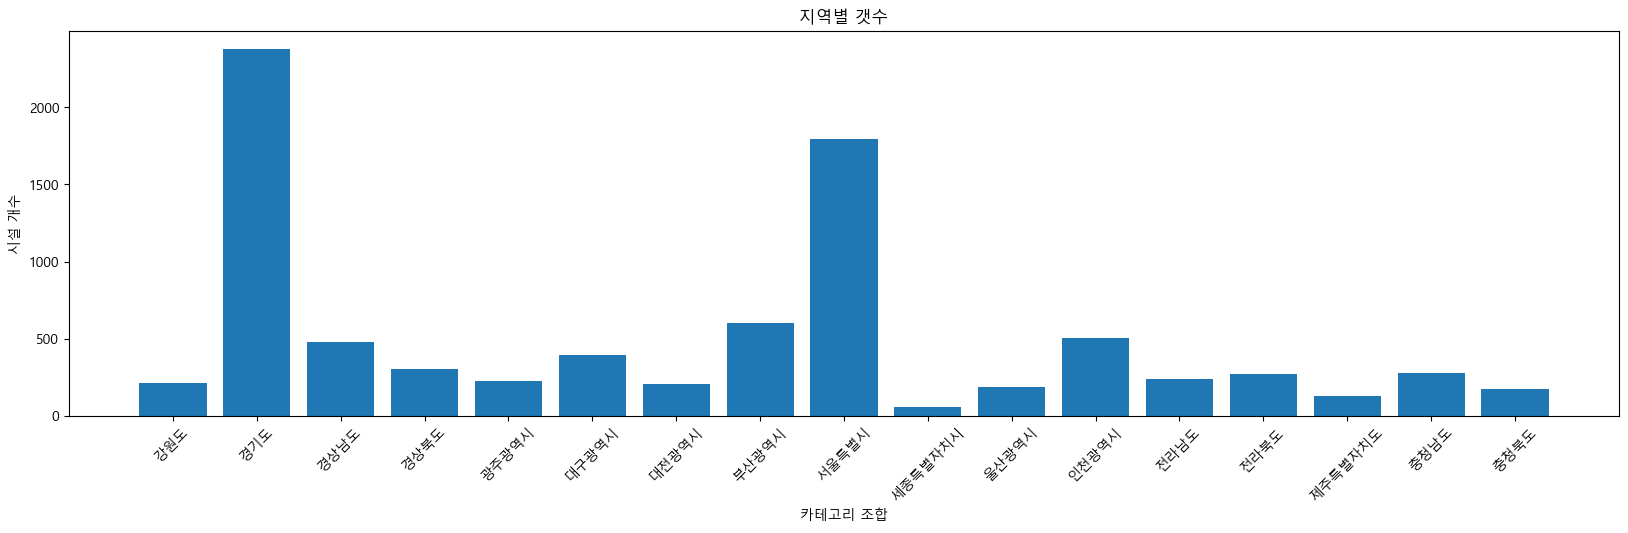

In [65]:
# 막대그래프 표현
plt.figure(figsize=(20,5))
plt.bar(grouped['시도 명칭'], grouped['시설 개수'])
plt.xlabel('카테고리 조합')
plt.ylabel('시설 개수')
plt.title('지역별 갯수')
plt.xticks(rotation=45)
plt.show()

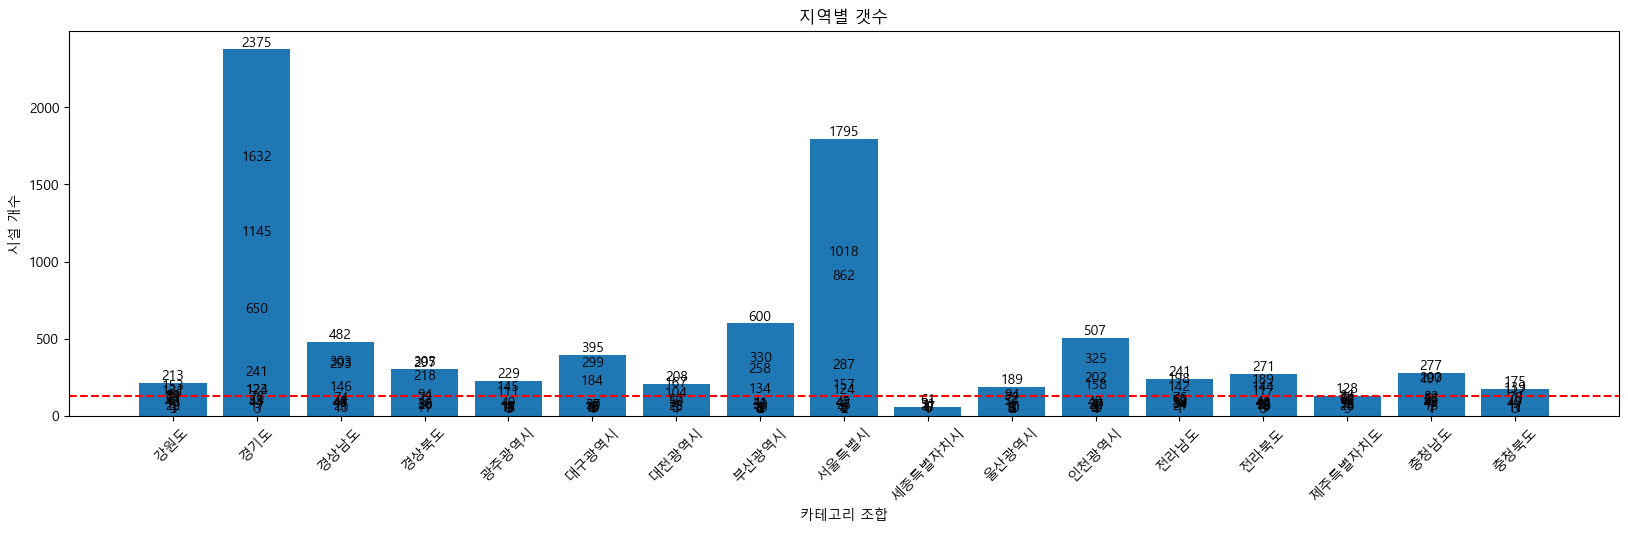

In [67]:
# 막대그래프 표현
plt.figure(figsize=(20,5))
bars = plt.bar(grouped['시도 명칭'], grouped['시설 개수'])

# 빈도수 표시
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.5, yval, ha='center', va='bottom')
    
# 평균선 추가
mean_value = grouped['시설 개수'].mean()
plt.axhline(y=mean_value, color='r', linestyle='--', label=f'평균 : {mean_value:-2f}')

plt.xlabel('카테고리 조합')
plt.ylabel('시설 개수')
plt.title('지역별 갯수')
plt.xticks(rotation=45)
plt.show()